# Observations and Insights 

Capomulin and Ramicane are the most effective treatment with the volume variance and the standard error of the mean half of the value of some of the other results.

Capomulin was seen to significantly reduce the size of tumors in mice over a 45 day period, by about 10mm3.

Mice weight seems to correspond with the tumor size. This seems to show that the heavier mice are less impacted by the treatment, or that mice that weigh less are more equipped to heal from a tumor. 


In [40]:
# Dependencies and Setup
import matplotlib.pyplot as plt

import pandas as pd

import scipy.stats as st

import numpy as np

import os

from scipy.stats import linregress

# Study data files
mouse_metadata_path = os.path.join("data/Mouse_metadata.csv")

study_results_path = os.path.join ("data/Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)

study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
total_results = pd.merge(mouse_metadata,study_results,on='Mouse ID',how='left')

# Display the data table for preview
total_results.head(10)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [41]:
# Checking the number of mice.
mice_count = len(total_results['Mouse ID'].unique())

mice_count


249

In [42]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Viewing count of all results to compare which ones stand out 
total_results['Mouse ID'].value_counts().head(20)

# View all duplicate results for "G989"
mice_results = total_results.set_index('Mouse ID')

duplicate = mice_results.loc['g989',:]

duplicate.head(12)


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [43]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_results = mice_results.drop(index = "g989")

clean_results_data = clean_results.reset_index()

clean_results_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [44]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = len(clean_results_data['Mouse ID'].unique())

clean_mice_count


248

## Summary Statistics

In [45]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Group data by "Drug Regimen"
drug_data = clean_results_data.groupby('Drug Regimen').agg(\
                                                             
        # Mean
        Tumor_Volume_Mean = ('Tumor Volume (mm3)', np.mean),\
                                                             
        # Median
        Tumor_Volume_Median = ('Tumor Volume (mm3)', np.median),\
                                                             
        # Variance
        Tumor_Volume_Variance = ('Tumor Volume (mm3)', np.var),\
                                                             
        # Standard Deviation
        Tumor_Volume_SD = ('Tumor Volume (mm3)', np.std),\
                                                             
        # SEM
        Tumor_Volume_SEM = ('Tumor Volume (mm3)', st.sem)\
                                                             
).round(1)


drug_data


,Tumor_Volume_Mean,Tumor_Volume_Median,Tumor_Volume_Variance,Tumor_Volume_SD,Tumor_Volume_SEM
Drug Regimen,,,,,
Capomulin,40.7,41.6,24.9,5.0,0.3
Ceftamin,52.6,51.8,39.3,6.3,0.5
Infubinol,52.9,51.8,43.1,6.6,0.5
Ketapril,55.2,53.7,68.6,8.3,0.6
Naftisol,54.3,52.5,66.2,8.1,0.6
Placebo,54.0,52.3,61.2,7.8,0.6
Propriva,52.3,50.4,43.9,6.6,0.5
Ramicane,40.2,40.7,23.5,4.8,0.3
Stelasyn,54.2,52.4,59.5,7.7,0.6


## Bar and Pie Charts

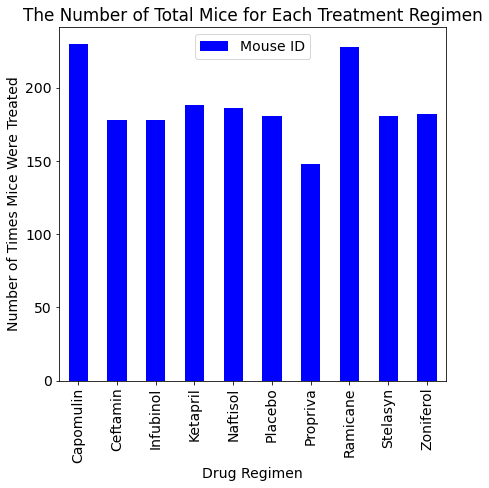

In [46]:
# Group by the 'Drug Regimen' column
drug_group = clean_results_data.groupby('Drug Regimen')

# Count number of times mice were treated with the drug
drug_group_count = pd.DataFrame(drug_group['Mouse ID'].count())


# Create a bar chart and title
drug_chart = drug_group_count.plot(kind='bar', title="The Number of Total Mice for Each Treatment Regimen", color="blue")

# Set the xlabel and ylabel
drug_chart.set_xlabel("Drug Regimen")

drug_chart.set_ylabel("Number of Times Mice Were Treated")

plt.tight_layout()

plt.show()


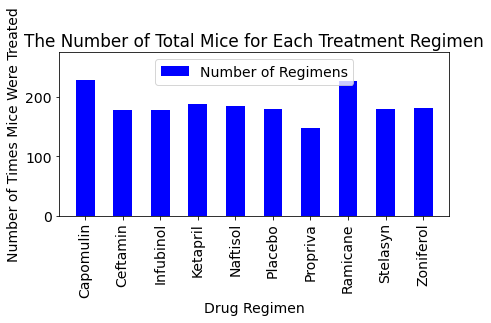

In [47]:
# Set x axis
x_axis = np.arange(len(drug_group_count))

tick_locations = [value for value in x_axis]

 # Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(7,3))

plt.bar(x_axis, drug_group_count['Mouse ID'], color='blue', align="center", width = .50)

plt.xticks(tick_locations, list(drug_group_count.index), rotation="vertical")

# Set x and y limits
plt.xlim(-0.7, len(x_axis)-0.3)

plt.ylim(0, max(drug_group_count['Mouse ID'])*1.20)

# Set a title and labels
plt.title("The Number of Total Mice for Each Treatment Regimen")

plt.xlabel("Drug Regimen")

plt.ylabel("Number of Times Mice Were Treated")

column_name = ['Number of Regimens']

plt.legend(column_name,loc="upper center")

plt.show()


In [48]:
# Create dataframe grouped by "Sex"
sex_df = clean_results_data.groupby('Sex')

grouped_sex_df = pd.DataFrame(sex_df['Sex'].count())

grouped_sex_df.head()


,Sex
Sex,
Female,922
Male,958


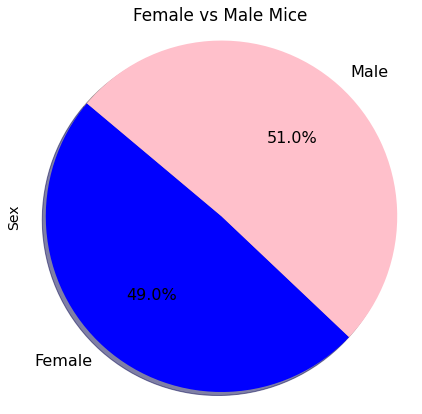

In [49]:
# Pie chart based off sex
grouped_sex_df.plot(kind='pie', y='Sex', \
                        title="Female vs Male Mice",startangle=140,\
                        autopct='%1.1f%%',shadow=True, fontsize=16, colors =["blue","pink"],legend =False)
# Make the axis equal to avoid plotting an egg shaped pie chart
plt.axis("equal")
plt.show()

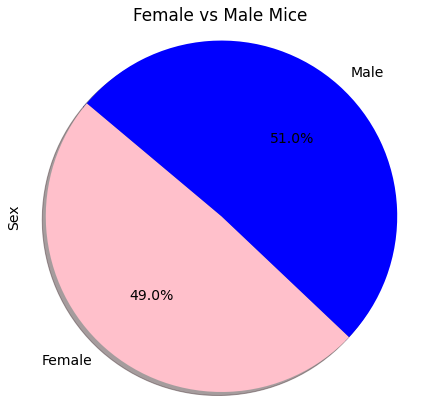

In [50]:
# Labels for chart from index values
gender = list(grouped_sex_df.index.values)

# Values of the two sections of the pie chart "Male and Female" 
gender_count = grouped_sex_df["Sex"]


# Colors for the chart
colors = ['pink', 'blue']

# Create chart and set a title / labels
plt.pie(gender_count, labels = gender, colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 140)

plt.rcParams['font.size'] = 14

plt.title("Female vs Male Mice")

plt.ylabel('Sex')

plt.axis('Equal')

plt.show()



## Quartiles, Outliers and Boxplots

In [51]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Create a list of the four drugs above
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

drug_list_df = clean_results_data[clean_results_data['Drug Regimen'].isin(drug_list)]


# Start by getting the last (greatest) timepoint for each mouse


# Group by "Drug Regimen" and "Mouse ID"
last_tumor_size = drug_list_df.groupby(['Drug Regimen','Mouse ID']).agg(\

# Get the last value of the tumor size                                                                         
last_tumor_sizes = ('Tumor Volume (mm3)',lambda x: x.iloc[-1])).round(1)

last_tumor_size



last_tumor_sizes
Drug Regimen Mouse ID                  
Capomulin    b128                  39.0
             b742                  38.9
             f966                  30.5
             g288                  37.1
             g316                  40.2
...                                 ...
Ramicane     s508                  30.3
             u196                  40.7
             w678                  43.2
             y449                  44.2
             z578                  30.6

[100 rows x 1 columns]

In [52]:
# Reshape dataframe with Drug Regimen as columns by using unstack, also move Last_tumor_size to index using stack
last_tumor_size_unstack = last_tumor_size.stack(level=0).unstack(level=0)



In [53]:
# Put treatments into a list for for loop (and later for plot labels)


# Quartile calculations for each drug
for drugs in drug_list:
    
    quartiles = last_tumor_size_unstack[drugs].quantile([.25,.5,.75]).round(2)
    
    lower_quartile = quartiles[0.25].round(1)
    
    upper_quartile = quartiles[0.75].round(1)
    
    iqr = round(upper_quartile-lower_quartile,2)
    
    lower_bound = round(lower_quartile - (1.5*iqr),2)
    
    upper_bound = round(upper_quartile - (1.5*iqr),2)
    
    
   # Print Results
    print(f"{drugs} IQR data is:")
    
    print(f"The lower quartile of {drugs} is: {lower_quartile}")
    
    print(f"The upper quartile of {drugs} is: {upper_quartile}")
    
    print(f"The interquartile range of {drugs} is: {iqr}")
    
    print(f"The the median of {drugs} is: {quartiles[0.5]} ")
    
    print(f"Values below {lower_bound} for {drugs} could be outliers.")
    
    print(f"Values above {upper_bound} for {drugs} could be outliers.")
    
    print(f"--------------------------------------------------------")
   
    

Capomulin IQR data is:
The lower quartile of Capomulin is: 32.4
The upper quartile of Capomulin is: 40.2
The interquartile range of Capomulin is: 7.8
The the median of Capomulin is: 38.1 
Values below 20.7 for Capomulin could be outliers.
Values above 28.5 for Capomulin could be outliers.
--------------------------------------------------------
Ramicane IQR data is:
The lower quartile of Ramicane is: 31.6
The upper quartile of Ramicane is: 40.7
The interquartile range of Ramicane is: 9.1
The the median of Ramicane is: 36.6 
Values below 17.95 for Ramicane could be outliers.
Values above 27.05 for Ramicane could be outliers.
--------------------------------------------------------
Infubinol IQR data is:
The lower quartile of Infubinol is: 54.0
The upper quartile of Infubinol is: 65.5
The interquartile range of Infubinol is: 11.5
The the median of Infubinol is: 60.2 
Values below 36.75 for Infubinol could be outliers.
Values above 48.25 for Infubinol could be outliers.
------------------

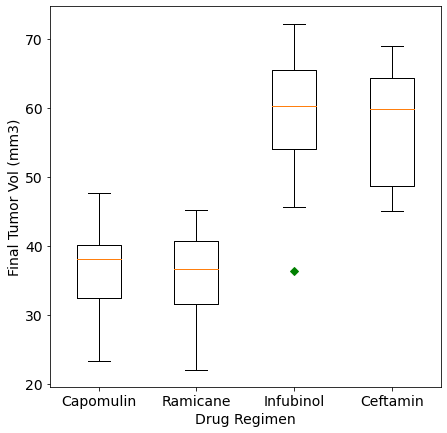

In [54]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Create an empty list
boxplot_list = []

# Iterate through the list of the drugs
# and appending to the boxplot_list
for drug in drug_list:
    boxplot_list.append(list(last_tumor_size_unstack[drug].dropna()))
    
# Plot the list of lists using a boxplot utilizing the same y-axis for all plots
fig1, ax = plt.subplots(figsize=(7,7))
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Final Tumor Vol (mm3)')
ax.boxplot(boxplot_list,notch=0,sym='gD')
plt.xticks([1,2,3,4],drug_list)

plt.show()


#### Line and Scatter Plots

In [55]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Create dataframe with data associated with Capomulin
capomulin = clean_results_data.loc[clean_results_data['Drug Regimen'] == 'Capomulin']


# 
tumor_time = capomulin.groupby(['Timepoint']).agg(\
        
        Tumor_Volume_Mean=('Tumor Volume (mm3)', np.mean),\
        
        Tumor_Volume_SEM=('Tumor Volume (mm3)', st.sem)\
                                                  
).round(1)

tumor_time


,Tumor_Volume_Mean,Tumor_Volume_SEM
Timepoint,,
0,45.0,0.0
5,44.3,0.4
10,43.1,0.7
15,42.1,0.8
20,40.7,0.9
25,39.9,0.9
30,38.8,0.9
35,37.8,1.1
40,37.0,1.2


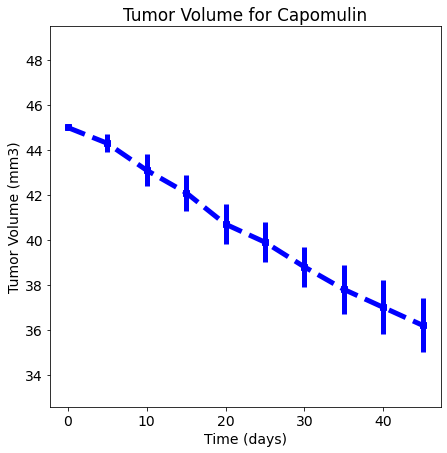

In [56]:
# Line plot using error bars

# get the values for the x axis
time = list(tumor_time.index.values)

# Use errorbar plot from matplotlib
plt.errorbar(
    time,
    
    tumor_time['Tumor_Volume_Mean'],
    
    yerr=tumor_time['Tumor_Volume_SEM'],
    
    label="Time Series of Tumor Volume for Capomulin",
    
    fmt="bs--", 
    
    linewidth=5
    
    )
# Add the title, x labels and y labels
plt.title("Tumor Volume for Capomulin")

plt.xlabel("Time (days)")

plt.ylabel("Tumor Volume (mm3)")

# Set x and y limits 
plt.xlim(min(time)-max(time)*0.05, max(time)*1.05)

plt.ylim(min(tumor_time['Tumor_Volume_Mean'])*.90, max(tumor_time['Tumor_Volume_Mean'])*1.1)

plt.rcParams["figure.figsize"] = [7,7]

plt.show()


## Correlation and Regression

In [57]:
# Groupby Mouse ID using .agg() method and get the weight and mean of tumor volume
mouse_id = capomulin.groupby(['Mouse ID']).agg(\
                                                        
        # Get the mean of the 'Tumor Volume (mm3)' column\
        mouse_weight=('Weight (g)', np.mean),\
                                                        
        # Get the standard error of measurement (SEM) of the 'Tumor Volume (mm3)' column\
        tumor_volume_mean=('Tumor Volume (mm3)', np.mean)\
                                                        
).round(1)

mouse_id.head(10)


,mouse_weight,tumor_volume_mean
Mouse ID,,
b128,22,42.0
b742,21,40.1
f966,17,36.5
g288,19,42.0
g316,22,44.6
i557,24,44.8
i738,20,39.1
j119,23,44.5
j246,21,43.2


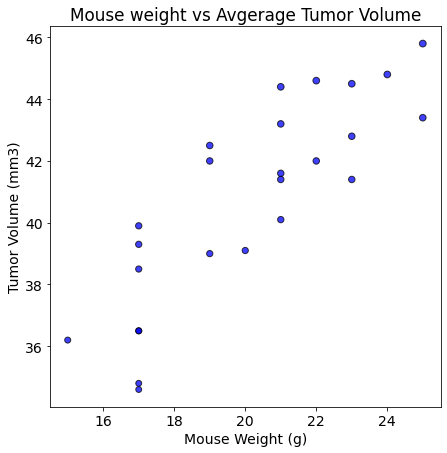

In [58]:
#create scatter plot from the above dataframe
plt.scatter(
    
    mouse_id['mouse_weight'],
    
    mouse_id['tumor_volume_mean'],
    
    marker='o',
    
    facecolors='blue',
    
    edgecolors='black',
    
    s=mouse_id['tumor_volume_mean'],
    
    alpha=.75)

# Create a title, x label, and y label for our chart
plt.title("Mouse weight vs Avgerage Tumor Volume")

plt.xlabel("Mouse Weight (g)")

plt.ylabel("Tumor Volume (mm3)")

plt.show()

In [59]:
correlation = st.pearsonr(mouse_id['mouse_weight'],mouse_id['tumor_volume_mean'])

print(f"Correlation between mouse weight and tumor volume mean is {round(correlation[0],2)}")

Correlation between mouse weight and tumor volume mean is 0.84


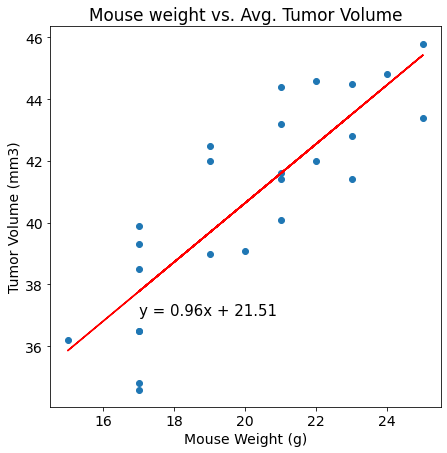

In [66]:
# Calculate the correlation coefficient and linear regression model between mouse weight and average tumor volume for the Capomulin treatment. Plot the linear regression model on top of the previous scatter plot.
x_values = mouse_id['mouse_weight']

y_values = mouse_id['tumor_volume_mean']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(17,37),fontsize=15,color="black")

plt.title("Mouse weight vs. Avg. Tumor Volume")

plt.xlabel("Mouse Weight (g)")

plt.ylabel("Tumor Volume (mm3)")

plt.show()